In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from collections import Counter
from functools import wraps
import numpy as np

# List to PMF

In [21]:
def sorted_dictionary(func):
    @wraps(func)
    def inner(*args,**kwargs):
        return dict(sorted(func(*args,**kwargs).items()))
    return inner

In [22]:
@sorted_dictionary
def list_to_pmf(series):
    n = len(series)
    d = {}
    counts = Counter(series)
    for _, key in enumerate(counts):
        d[key] = counts[key]/n
    return d

### 4b

In [81]:
@sorted_dictionary
def list_to_pmf_2(series):
    n = len(series)
    d = {}
    for i in series:
        if i in d.keys():
            d[i]+=1/n
        else:
            d[i]=1/n
    return d

### Plotting the PMF

In [90]:
a = np.random.randint(10,size=(1,10))[0]

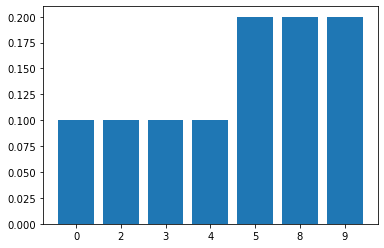

In [93]:

pmf = list_to_pmf_2(a)

_ = plt.bar(range(len(pmf)), list(pmf.values()))
_ = plt.xticks(range(len(pmf)), list(pmf.keys()))

In [92]:
pmf

{0: 0.1, 2: 0.1, 3: 0.1, 4: 0.1, 5: 0.2, 8: 0.2, 9: 0.2}

# List to CDF

In [25]:
def list_to_cdf(series):
    pmf = list_to_pmf(series)
    cumsum = 0
    percentiles = {}
    for x,value in pmf.items():
        cumsum += value
        percentiles[x]=cumsum
    return percentiles

### Plotting the CDF

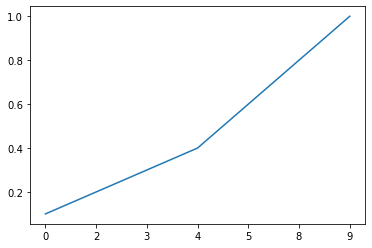

In [94]:
cdf = list_to_cdf(a)
_ = plt.plot(range(len(cdf)), list(cdf.values()))
_ = plt.xticks(range(len(cdf)), list(cdf.keys()))

In [ ]:
def percentile(N, percent, key=lambda x:x):
    """ 
    Find the percentile of a list of values. 
    @parameter N - is a list of values. Note N MUST BE already sorted. 
    @parameter percent - a float value from 0.0 to 1.0. 
    @parameter key - optional key function to compute value from each element of N. 
    @return - the percentile of the values 
    """ 

    if N is None: 
        return None 

    k = (len(N)-1) * percent 
    f = math.floor(k) 
    c = math.ceil(k) 

    if f == c:
        return key(N[int(k)]) 

    d0 = key(N[int(f)]) * (c-k)
    d1 = key(N[int(c)]) * (k-f) 

    return (d0+d1)/100.